# Hypothesis Testing with Insurance Data (Core)

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('insurance - insurance.csv')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# Question # 1:
Do smokers have higher insurance charges than non-smokers?

## Hypothesis

- <b>H0 (Null Hypothesis)</b> : Smokers and Non-smoker doesn't have much difference in insurance charges. <br>
- <b>HA (Alternative Hypothesis)</b> : There is a significant difference between the insurance charges of Smokers and Non-smokers.

## Appropriate test to perform

- 2 groups/samples: Smokers & Non-smokers
- Numerical Type: Insurance Charges
- <b>We are going to perform 2 sample T-Test or Independent T-Test 
    
## Assumptions 
    
- No significant outliers
- Normality
- Equal Variance
    
### Initial Visualization

In [3]:
# using df method to check if smokers and non smokers are distributed
smokers_df = df.loc[df['smoker'] == 'yes', ['charges', 'smoker']]
non_smokers_df = df.loc[df['smoker'] == 'no', ['charges', 'smoker']]

In [4]:
# checking if all smokers are 'yes'
smokers_df.sample(3)

,charges,smoker
30,35585.57600,yes
109,47055.53210,yes
146,40720.55105,yes


In [5]:
# checking if all smokers are 'no'
non_smokers_df.sample(3)

,charges,smoker
1271,3021.80915,no
309,7749.15640,no
1220,4718.20355,no


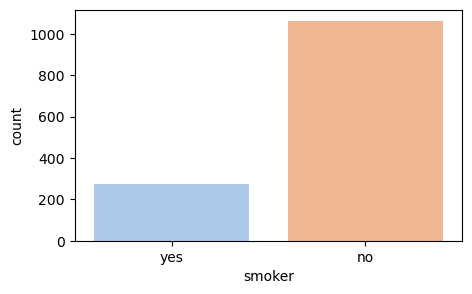

In [6]:
plt.figure(figsize = (5, 3))
ax = sns.countplot(df, x = 'smoker', palette = 'pastel')

- Initial graph shows that we don't have a balanced target.
### Dealing with Outliers

In [7]:
smoker = smokers_df['charges']
non_smoker = non_smokers_df['charges']

smoker_ouliers = np.abs(stats.zscore(smoker)) > 3
non_smoker_ouliers = np.abs(stats.zscore(smoker)) > 3

print(f'We have a total number of {smoker_ouliers.sum()} outliers under smokers.')
print(f'We have a total number of {non_smoker_ouliers.sum()} outliers under non-smokers.')

We have a total number of 0 outliers under smokers.
We have a total number of 0 outliers under non-smokers.


- Seems like we don't have any outliers in this dataset.

### Normality Testing

In [26]:
smoker_result = stats.normaltest(smoker)
non_smoker_result = stats.normaltest(non_smoker)

print(f'Smoker group: {smoker_result.pvalue}')
print(f'    Pvalue < .05? {smoker_result.pvalue < .05}')
print(f'Non-smoker group: {non_smoker_result.pvalue}')
print(f'    Pvalue < .05? {non_smoker_result.pvalue < .05}')

Smoker group: 5.564930630036463e-14
    Pvalue < .05? True
Non-smoker group: 1.9193129759002216e-69
    Pvalue < .05? True


- Both Smoker and Non-smoker have less than 0.05 p-value. This means that the target is NOT normally distributed as we can see in the graph. 

- Our group sizes are large enough, we can safely ignore the normality assumption.

### Variance Testing

In [25]:
result = stats.levene(smoker, non_smoker)
print(result.pvalue)
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

1.5593284881803726e-66
The groups do NOT have equal variance.


- We FAILED to meet the assumption of equal variance. We are running the Welch's T-Test, which is designed to account for unequal variance.

In [10]:
result = stats.ttest_ind(smoker, non_smoker, equal_var = False)
print(result)
print(f'    Pvalue < .05? {result.pvalue < .05}')

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)
    Pvalue < .05? True


- Our Welch's T-Test returned < 0.05. We REJECT the null hypothesis and support the Alternative Hypothesis that. **There is a significant difference between the insurance charges of Smokers and Non-smokers.**

## Final Visuaization

# Question 2:
Are men more likely to smoke than women?

## Hypothesis

- <b>H0 (Null Hypothesis)</b> : There's is not much difference between men and women when when it comes to likeliness of smoking. <br>
- <b>HA (Alternative Hypothesis) : There's is significant difference between men and women when when it comes to likeliness of smoking.</b> 

## Appropriate test to perform

- 2 sample: Men & Women
- Categorical Type
- Chi-square
    
## Assumptions 
    
- There are two categorical variables
- The outcomes are independent.

### Crosstab

In [28]:
smoker = pd.crosstab(df['sex'], df['smoker'])
smoker

smoker,no,yes
sex,,
female,547,115
male,517,159


In [29]:
result = stats.chi2_contingency(smoker)
chi2, p, deg_free, expected_vals = result
print(p)

0.006548143503580696


- The result return < 0.05. This means that we REJECT the null hypothesis and support that **There's is significant difference between men and women when when it comes to likeliness of smoking.**

## Final Visualization

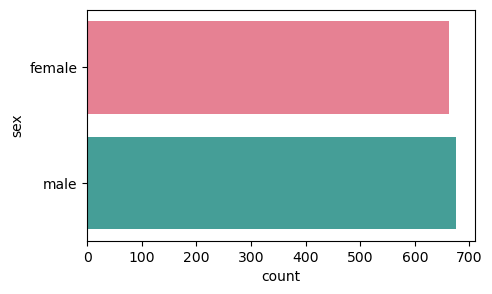

In [30]:
plt.figure(figsize = (5, 3))
ax = sns.countplot(df, y = 'sex', palette = 'husl')

# Question 3:
Do different regions have different charges, on average?

## Hypothesis

- <b>H0 (Null Hypothesis)</b> : Different Regions doesn't have much difference on average charges. <br>
- <b>HA (Alternative Hypothesis)</b> : There is a significant difference on average charges for every region.


In [11]:
# checking the regions as per question 3
regions = df['region'].unique()
regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Appropriate test to perform

- Multi samples: southeast, southwest, northwest, northeast
- Numerical Type: charges
- ANOVA and/or Tukey
    
## Assumptions 
    
- No significant outliers
- Equal variance
- Normality
    
### Initial Visualization

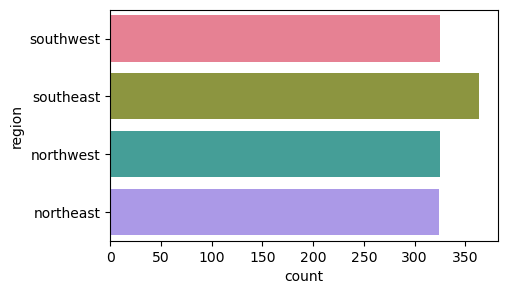

In [12]:
plt.figure(figsize = (5, 3))
ax = sns.countplot(df, y = 'region', palette = 'husl')

- Our graph shows that southwest, northwest and northeast almost have the same distribution while southeast is a little higher.
### Dealing with Outliers

In [13]:
groups = {}

for i in df['region'].unique():
    temp = df.loc[df['region'] == i, 'charges']
    groups[i] = temp

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [14]:
for region, data in groups.items():

    outliers = np.abs(stats.zscore(data)) > 3
    print(f"There were {outliers.sum()} outliers in the {region} group.")

    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


### Normality Testing

In [15]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data), 
                       'p': p, 
                       'test stat': stat}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [16]:
# checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


- Our p-values turns out to be lower than 0.05. Our target is not normally distributed.

- Our group sizes are large enough, we can safely ignore the normality assumption.
### Variance Testing

In [17]:
result = stats.levene(*groups.values())
print(result)
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)
The groups do NOT have equal variance.


- Our Variance testing states that we do not have an equal variance in our target.
## One Way ANOVA Test

In [18]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway(*groups.values())
print(result)
print(f'    Pvalue < .05? {non_smoker_result.pvalue < .05}')

F_onewayResult(statistic=5.496394682506454, pvalue=0.0009419710075537749)
    Pvalue < .05? True


- We have less p-value on ANOVA, this means that as per ANOVA we will REJECT the Null hypothesis and support the Alternative Hypothesis that ***There is a significant difference on average charges for every region.***
## Tukey's Pairwise

In [19]:
## make a list for saving the dataframes to
tukeys_dfs = []
for sector, temp in groups.items():
    temp_df = pd.DataFrame({'Charges' : temp, 'Sector' : sector})
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,Charges,Sector
0,16884.92400,southwest
12,1826.84300,southwest
15,1837.23700,southwest
18,10602.38500,southwest
19,36837.46700,southwest
...,...,...
1321,28101.33305,northeast
1325,13143.33665,northeast
1326,7050.02130,northeast
1328,22395.74424,northeast


In [20]:
# save values
values = tukeys_data['Charges']
labels = tukeys_data['Sector']

In [27]:
# perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-1340.917,0.4263,-3611.7411,929.9072,False
northeast,southeast,1529.834,0.2794,-670.6825,3730.3505,False
northeast,southwest,-1511.915,0.3181,-3784.5349,760.705,False
northwest,southeast,2870.7509,0.0046,666.5645,5074.9374,True
northwest,southwest,-170.998,0.9974,-2447.1716,2105.1756,False
southeast,southwest,-3041.7489,0.0023,-5247.7854,-835.7125,True


A. We REJECT the Null Hypothesis between:
1. northwest vs. southeast
2. southeast vs southwest
- We will support the Alternative Hypothesis that, ***There is a significant difference on average charges for these specific regions.***

B. We FAIL TO REJECT the Null Hypothesis on:
1. northeast vs northwest
2. northeast vs southwest
3. northeast vs southwest
4. northwest vs southwest
- We will support the Null Hypothesis that says, ***Theses regions doesn't have much difference on average charges.***
## Final Visualization

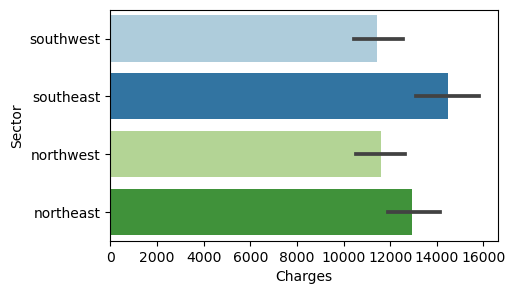

In [22]:
plt.figure(figsize = (5, 3))
ax = sns.barplot(tukeys_data, y = 'Sector', x = 'Charges', palette = 'Paired')

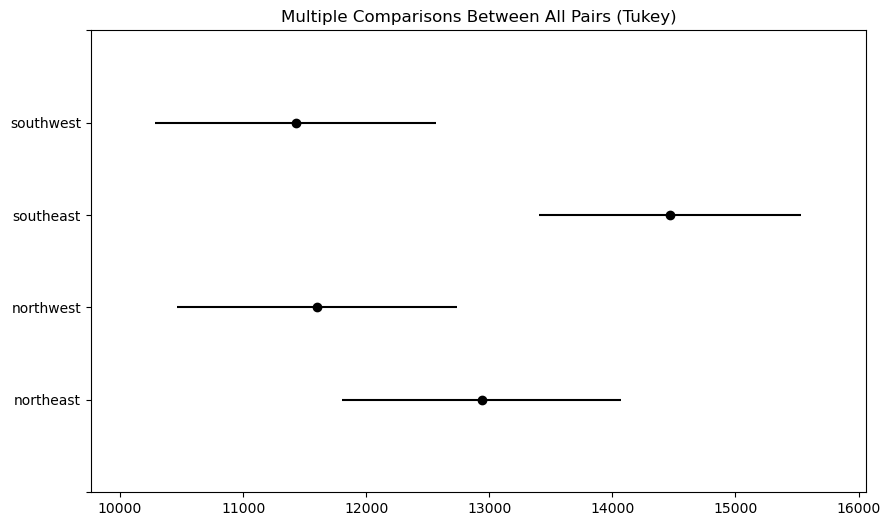

In [23]:
tukeys_results.plot_simultaneous();